## 2.1 简单线性回归

在前面的章节中，我们学到了在监督学习问题中用训练数据估计一个模型的参数。用解释变量的观察值及其对应的响应变量组成训练数据，训练好的模型可用于预测未被观测到的解释变量值对应的响应变量值。回顾一下，回归问题的目标是去预测一个连续响应变量的值。在本章中，我们将检验简单线性回归，它常用于对一个响应变量和解释变量的特征之间的关系进行建模。

假设你希望了解披萨的价格。你可能会简单地查看菜单。然而，本书是一本关于机器学习的图书，因此我们将基于能观测到的披萨的属性或者说解释变量，来预测披萨的价格。让我们来对披萨的尺寸和价格之间的关系进行建模。首先，我们将使用 scikit-learn 编写一段程序，通过提供的披萨尺寸来预测其价格。接着我们将讨论简单线性回归如何运行以及如何将其泛化来解决其他类型的问题。

假设你已经记录下了已经吃过的披萨的直径和价格。表 2.1 中的观测值组成了我们的训练数据。

| 训练实例 | 直径（单位：英寸） | 价格（单位：美元） |
| -------- | ----------------- | ----------------- |
| 1        | 6                 | 7                 |
| 2        | 8                 | 9                 |
| 3        | 10                | 13                |
| 4        | 14                | 17.5              |
| 5        | 18                | 18                |

我们可以使用 matplotlib 作图来将训练数据可视化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([6,8,10,14,18]).reshape(-1, 1)
y = np.array([7, 9 ,13, 17.5, 18]).reshape(-1, 1)

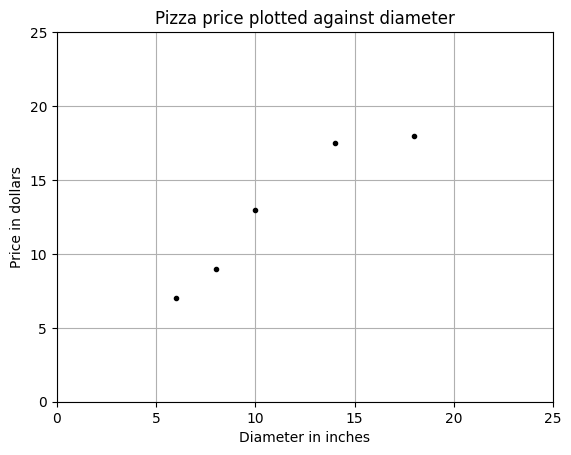

In [3]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

脚本中的注释标明X是表示披萨直径的矩阵， y是表示披萨价格的向量。这样做的原因将会在下一章中阐明。这段脚本会生成图 2.1。披萨的直径在x轴上绘制，披萨的价格在y轴上绘制：

从训练数据的图 2.1 中我们可以看出披萨的直径和价格之间存在正相关关系，这应该可以由自己吃披萨的经验所证实。随着披萨直径的增加，它的价格通常也会上涨。下面的代码 2.2 使用了简单线性回归来对这个关系进行建模。让我们来查看这段代码，并且讨论简单线性回顾是如何运行的。

In [4]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X, y)

LinearRegression()

In [5]:
test_prize = np.array([12]).reshape(-1, 1)
lin_model.predict(test_prize)

array([[13.68103448]])

简单线性模型假设响应变量和解释变量之前存在线性关系，它使用一个被称为`超平面`的线性面来对这种关系进行建模。一个超平面是一个子空间，它比组成它的环绕空间小一个维度。在简单线性回归中共有两个维度，一个维度表示响应变量，另一个维度表示解释变量。因此，回归超平面只有一个维度，一个一维的超平面是一条直线。

LinearRegression 类是一个估计器。估计器基于观测到的数据预测一个值。在scikit-learn 中，所有的估计器都实现了`fit`方法和`predict`方法。前者用于学习模型的参数，后者使用学习到的参数来预测一个解释变量对应的响应变量值。使用 scikit-learn 可以非常简单地对不同模型进行实验，因为所有的估计器都实现了`fit`和`predict`方法，尝试新的模型只需要简单地修改一行代码。 LinearRegression 的`fit`方法学习了公式2.1 简单线性回归模型的参数：

$$y = \alpha + \beta x$$

在上面的公式中， y 是响应变量的预测值，在这个例子里，它表示披萨的预测价格。 x表示解释变量。截断项$\alpha$和系数$\beta$都是可以通过学习算法学到的模型参数。在图 2.2 中，绘制的超平面对一个披萨的价格和尺寸之间的关系进行建模。使用这个模型，我们可以预测一个直径为 8 英寸的披萨的价格应该为 7.33 美元，一个直径为 20 英寸的披萨价格应该为 18.75 美元。

* 注：其中$\beta$ =`lin_model.coef_`， $\alpha$ = `lin_model.intercept_`

In [6]:
lin_model.coef_, lin_model.intercept_

(array([[0.9762931]]), array([1.96551724]))

In [7]:
line_x = np.linspace(0, 25, num=26)
line_y = lin_model.predict(line_x.reshape(-1, 1))
# Or
# line_y = line_x * lin_model.coef_ + lin_model.intercept_

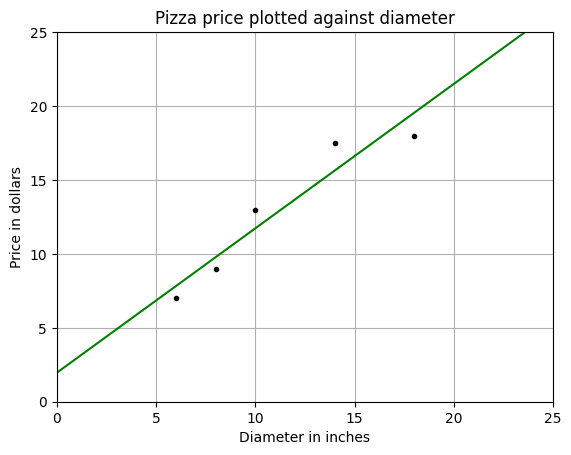

In [8]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot(line_x, line_y.reshape(26),'g')
plt.show()

利用训练数据学习产生最佳拟合模型的简单线性回归的参数值称为`普通最小二乘`（Ordinary Lease Squares， OLS）或线性最小二乘。在本章中，我们将讨论一种分析解出模型参数值的方法。在后面的章节中，我们将学习适用于在大数据集合中逐渐逼近参数值的方法，但是首先必须要定义模型拟合训练数据。

### 2.1.1 用代价函数评价模型的拟合性
在图 2.3 中我们根据一些参数集合的值绘制出几条回归线。然而我们如何去评估哪组参数值产生了最佳拟合回归线呢？

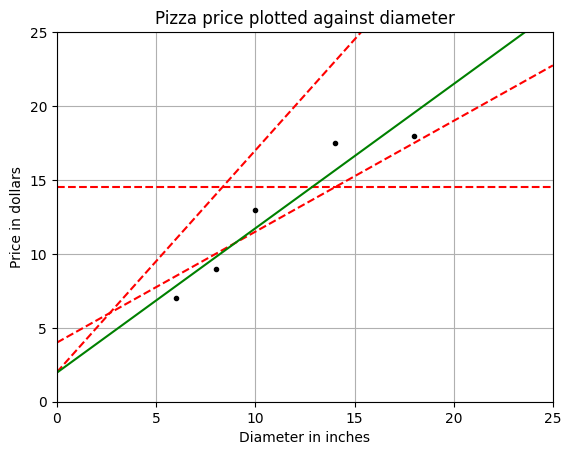

In [9]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
# plt.plot(line_x, line_y.reshape(26),'g')
for (coef_, intercept_) in [[1.5, 2], [0.75, 4], [0, 14.5]]:
    line_y_test = line_x * coef_ + intercept_
    plt.plot(line_x, line_y_test, 'r--')
line_y = line_x * lin_model.coef_ + lin_model.intercept_
plt.plot(line_x, line_y.reshape(26),'g')
plt.show()

`代价函数`，也被称为`损失函数`，它用于定义和衡量一个模型的误差。由模型预测出的价格和在训练数据集中观测到的披萨价格之间的差值被称为残差或者训练误差。稍后，我们将使用一个单独的测试数据集来评价模型。 在测试数据中预测值和观测值之间的差值叫作预测误差或者测试误差。在图 2.4 中，模型的残差由训练实例点和回归超平面之间垂直线表示。

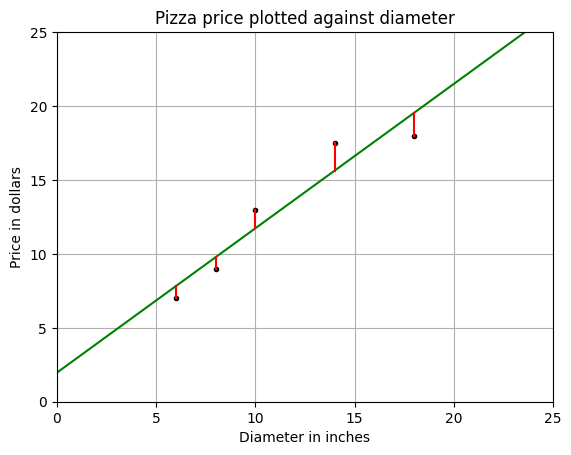

In [10]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
# plt.plot(line_x, line_y.reshape(26),'g')
line_y = line_x * lin_model.coef_ + lin_model.intercept_
plt.plot(line_x, line_y.reshape(26),'g')
y_pred = X * lin_model.coef_ + lin_model.intercept_
for i in range(len(X)):
    plt.plot(np.array([X[i], X[i]]), np.array([y[i], y_pred[i]]), 'r')
plt.show()

我们可以通过最小化残差的和来生成最佳披萨价格预测器。也就是说，对于所有训练数据而言，如果模型预测的响应变量都接近观测值，那么模型就是拟合的，这种衡量模型拟合的方法叫作`残差平方和`（RSS）代价函数。在形式上，该函数通过对所有训练数据的残差平方求和来衡量模型的拟合性。 RSS 由下面方程的公式 2.2 计算出，其中 $y_i$ 是观测，$f(x_i)$是预测值：
$$SS_{res} = {\sum^n_{i=1}(y_i-f(x_i))^2}$$
我们可以在代码 2.2 后面加上以下两行代码来计算模型的 RSS，如代码 2.3 所示：

In [11]:
np.mean((lin_model.predict(X) - y) ** 2)

1.7495689655172406

现在我们有了一个代价函数，可以通过求这个函数的极小值来找出模型的参数值。

### 2.1.2 求解简单线性回归的 OLS
在这一部分中，我们将求解出简单线性回归的OLS。回想一下，简单线性回归由方程$y =\alpha +\beta x$ 给出，而我们的目标是通过求代价函数的极小值来求解出$\beta$和$\alpha$的值。首先我们将解出$\beta$值，为了达到目的，我们将计算 x 的方差以及 x 和 y 的协方差。方差用来衡量一组偏离程度，如果集合中的所有数值都相等，那么这组值的方差为 0。方差小意味着这组值都很接近总体均值，而如果集合中包含偏离均值很远的数据则集合会有很大的方差。方差可以使用下面的公式 2.3 算出：
$$
var(x) = \frac{\sum^n_{i=1}(x_i-\bar x)^2}{n-1}
$$

$\bar x$ 表示 x 的均值， $x_i$ 是训练数据中的第 i 个 x 的值， n 表示训练数据的总量。我们来计算一下训练数据中披萨直径的方差，如代码 2.4 所示：

In [12]:
X_bar = np.mean(X)
print(X_bar)
variance = np.sum((X-X_bar)**2)/(X.shape[0]-1)
print(variance)

11.2
23.2


Numpy库也提供了一个叫作`var`的方法来计算方差。计算样本方差时关键字参数`ddof`可以设置贝塞尔校正，如代码 2.5 所示：

* 用样本的方差去估计的总体的方差的时候需要通过`贝塞尔校正` 。分母减一，使值变大一点。
* 原因在于：比如在高斯分布（正态分布）中，抽取一部分的样本，用样本的方差来估计总体的方差。由于样本主要是落在x=u中心值附近，那么样本方差一定小于总体的方差（因为高斯分布的边沿抽取的数据很少）。为了能弥补这方面的缺陷，那么我们把公式的n改为n-1,以此来提高方差的数值。这种方法叫做贝塞尔校正系数。

In [13]:
np.var(X, ddof=1)

23.2

协方差用来衡量两个变量如何一同变化。如果变量一起增加，它们的协方差为正。如果一个变量增加时另一个变量减少，它们的协方差为负。如果两个变量之间没有线性关系，它们的协方差为 0，它们是线性无关的但不一定是相对独立的。协方差可以使用下面的公式 2.4 计算：
$$
cov(x, y) =\frac{\sum_{i=1}^n (x_i - \bar x_i)(y_i-\bar y_i)}{n-1}
$$

和方差一样， $x_i$表示训练数据中第i个x的值，$\bar x$表示直径的均值，$\bar y$表示价格的均值，$y_i$ 表示训练数据中第i个y的值，n表示训练数据的总量。我们来计算一下训练数据中披萨半径和价格的协方差，如代码 2.6 所示：

In [14]:
y_bar = np.mean(y)

In [15]:
covariance = np.multiply((X - X_bar), (y-y_bar)).sum()/(X.shape[0] - 1)
print(covariance)
# 或者向量方法
# covariance = np.dot((X-X_bar).T, (y-y_bar))/(X.shape[0] - 1)
# 或者numpy提供的方法[貌似会有精度问题]
print(np.cov(X.T, y.T)[0][1])

22.65
22.650000000000002


现在我们已经计算出了解释变量的方差以及解释变量和响应变量之间的协方差，可以使用公式 2.5 解出$\beta$值：
$$\beta = \frac{cov(x, y)}{var(x)} $$

In [16]:
beta = covariance/variance
print(beta)
lin_model.coef_

0.9762931034482758


array([[0.9762931]])

解出$\beta$值以后，我们可以使用公式 2.6 解出$\alpha$值：
$$
\alpha = \bar y - \beta \bar x
$$

在此处$\bar y$是 y 的均值， $\bar x$是x的均值。 $(\bar x , \bar y)$是质心的坐标，是一个模型必须经过的点。

In [17]:
alpha = y_bar - beta * X_bar
print(alpha)
lin_model.intercept_

1.9655172413793114


array([1.96551724])

现在我们已经通过求代价函数的极小值解出了模型的参数值，可以带入披萨的直径预测它们的价格。例如，一个 11 英寸的披萨预计花费 12.70 美元，一个 18 英寸的披萨预计花费 19.54 美元。恭喜！你已经使用简单线性回归预测了披萨的价格。

## 2.2 评价模型
我们已经使用了一种学习算法从训练数据中估计出了模型的参数。我们如何评估模型是否很好地表达了现实中解释变量和响应变量之间的关系呢？假设你找到了另一页披萨菜单，我们将使用这页菜单中的条目作为测试数据集来衡量模型的表现。表 2.2 是一个包含 4列数据的表格，其中包含了由我们的模型预测出的披萨价格。

| 测试实例 | 披萨直径（单位：英寸） | 真实价格（单位：美元） | 预测价格（单位：美元） |
| -------- | -------------------- | -------------------- | -------------------- |
| 1        | 8                    | 11                   | 9.7759               |
| 2        | 9                    | 8.5                  | 10.752               |
| 3        | 11                   | 15                   | 12.705               |
| 4        | 16                   | 18                   | 17.586               |
| 5        | 12                   | 11                   | 13.681               |

我们可以使用一些衡量方法来评估模型的预测能力。在此我们使用一种叫作`R方`的方法来评估披萨价格预测器。 R 方，也被称为`决定系数`，它用来衡量数据和回归线的贴近程度。计算 R 方的方法有多种，在简单线性回归模型中，R方等于`皮尔森积差相关系数`（PPMCC）的平方，也被称为`皮尔森相关系数r`的平方。使用该计算方法， R方必须是0和1之间的正数，其原因很直观：如果 R 方描述的是由模型解释的响应变量中的方差的比例，这个比例不能大于 1 或者小于 0。其他一些计算方法，包括 scikit-learn 库使用的方法，不使用皮尔森相关系数 r 的平方公式计算 R 方。如果模型的表现非常差，由这些计算方法求出的 R 方可能为负值。了解性能指标的局限性非常重要，**R方对于异常值尤其敏感**，当新的特征增加到模型中时，它常常会出现异样的增长。

我们通过 scikit-learn 使用的方法来计算披萨价格预测器的 R 方。首先我们需要算出平方总和。$y_i$是第i个测试实例的响应变量观测值，$\bar y$是响应变量的观测值均值，如公式2.7 所示。

$$
SS_{tot} = \sum_{i=1}^n(y_i - \bar y)^2
$$

In [18]:
X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11]).reshape(-1, 1)
y_t_pred = lin_model.predict(X_test)

In [19]:
SS_tot = np.sum((y_test - np.mean(y_test)) ** 2)
print(SS_tot)

56.8


其次我们需要算出 RSS。回顾一下此公式和前面提到的代价函数的计算公式相同，如公式 2.8 所示：
$$SS_{res} = {\sum^n_{i=1}(y_i-f(x_i))^2}$$


In [20]:
SS_res = np.sum((y_test - y_t_pred)**2)
print(SS_res)

19.1980993608799


最后，我们使用公式 2.9 计算出 R方：
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

In [21]:
R_2 = 1 - SS_res/SS_tot
print(R_2)

0.6620052929422553


## 2.3 小结
在本章中，我们介绍了简单线性回归模型，它对单个解释变量和连续响应变量之间的关系进行建模。我们通过一个问题由披萨的直径来预测其价格。我们使用残差平方和代价函数来评估模型的拟合性，并通过求代价函数的极小值分析解出模型参数，并在一个测试数据集上衡量模型的性能。最后我们介绍了scikit-learn类库的估计器 API。在下一章中，我们将比较简单线性回归和另一种简单普适的模型—`K-近邻算法`（KNN）。